In [ ]:
import pandas as pd

chipo = pd.read_csv("chipotle.tsv.txt", sep="\t")

In [ ]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [ ]:
chipo["order_id"] = chipo["order_id"].astype(str)

In [ ]:
chipo["order_id"].unique()

len(chipo["order_id"].unique())

1834

In [ ]:
chipo.groupby("item_name")["order_id"].count()

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


<function matplotlib.pyplot.show(*args, **kw)>

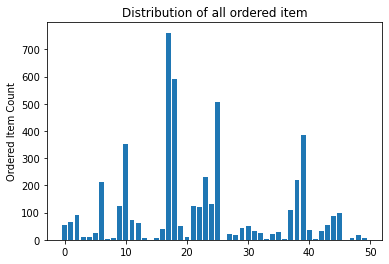

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_quantity = chipo.groupby("item_name")["quantity"].sum()
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = "center")
plt.ylabel("Ordered Item Count")
plt.title("Distribution of all ordered item")
plt.show

In [ ]:
chipo["item_price"] = chipo["item_price"].apply(
     lambda x: float(x[1:])
)

In [ ]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [ ]:
chipo_order_id_group = chipo.groupby("order_id").sum()
chipo_order_id_group[chipo_order_id_group["item_price"]>= 10]

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


<function matplotlib.pyplot.show(*args, **kw)>

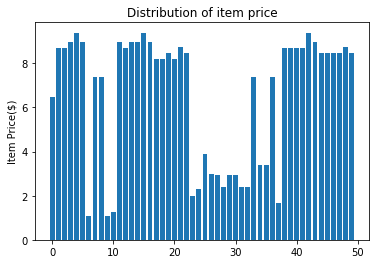

In [ ]:
chipo_singular = chipo[chipo["quantity"] == 1]
price_per_item = chipo_singular.groupby("item_name").min()

%matplotlib inline
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item["item_price"].tolist()

plt.bar(x_pos, item_price, align = "center")
plt.ylabel("Item Price($)")
plt.title("Distribution of item price")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

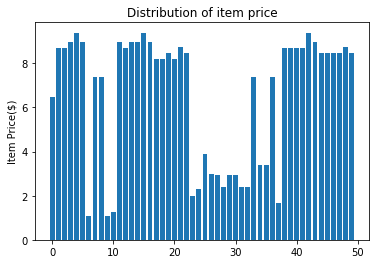

In [ ]:
chipo_singular = chipo
price_per_item = chipo_singular.groupby("item_name").min()

%matplotlib inline
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item["item_price"].tolist()

plt.bar(x_pos, item_price, align = "center")
plt.ylabel("Item Price($)")
plt.title("Distribution of item price")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

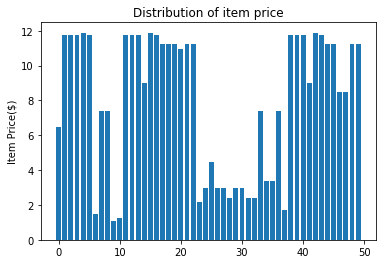

In [ ]:
chipo_singular = chipo[chipo["quantity"] == 1]
price_per_item = chipo_singular.groupby("item_name").max()

%matplotlib inline
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item["item_price"].tolist()

plt.bar(x_pos, item_price, align = "center")
plt.ylabel("Item Price($)")
plt.title("Distribution of item price")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

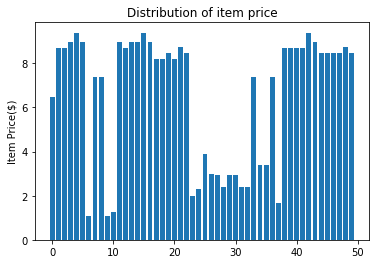

In [ ]:
chipo_singular = chipo[chipo["quantity"] == 1]
price_per_item = chipo_singular.groupby("item_name").min()

%matplotlib inline
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item["item_price"].tolist()

plt.bar(x_pos, item_price, align = "center")
plt.ylabel("Item Price($)")
plt.title("Distribution of item price")
plt.show

In [ ]:
df.plot(
    kind="hist",
    subplots = True,
    layout=(2,2)
)
plt.suptitle("Iris Histogram")
plt.show()